## Experiment reporter
* Tool for analysing the experiment results, stored in loggers


In [17]:
import pickle
import sys
sys.path.append('/home/dosoukup/Dataset/drift-katoda-v2/katoda-tools/drift-analysis')
from detector.reporter import Reporter

with open('../output/logs_baseline_retraining.pkl', 'rb') as inp:
    logger_retrained = pickle.load(inp)
with open('../output/logs_baseline.pkl', 'rb') as inp:
    logger_reference = pickle.load(inp)

reporter_retrained = Reporter(logger_retrained, ["Retraining Model"], chunk_length=7)
reporter_reference = Reporter(logger_reference, ["Reference Model"], chunk_length=7)

### Global overview of the experiment results
Show how the experiments were defined and get the broad overview of experiment results

In [18]:
reporter_retrained.print_experiment_overview()
reporter_reference.print_experiment_overview()

1 experiments were performed, each with 33 rounds of detection,
Experiment was generated based on fixed samples window


,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Retraining Model,33,0.111825,0.021455,0.500337,0.125999,0.979984,0.014169



The experiments and their tests were defined as follows:
Experiment 0: Retraining Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present

1 experiments were performed, each with 33 rounds of detection,
Experiment was generated based on fixed samples window


,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Reference Model,33,0.107899,0.020517,0.479798,0.16437,0.959953,0.016063



The experiments and their tests were defined as follows:
Experiment 0: Reference Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present



 * Plotting global results leads to the first overview of differences between the experiments
    * The style of this graph cen be user defined

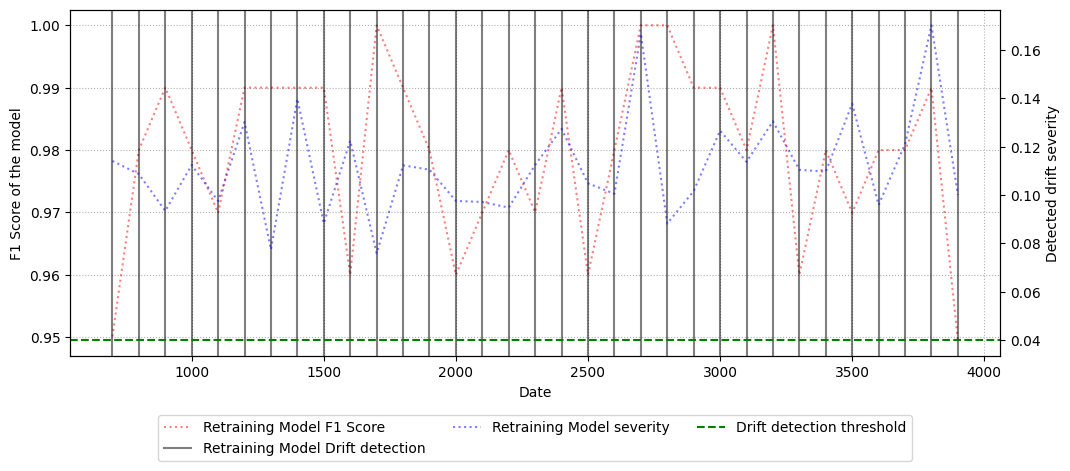

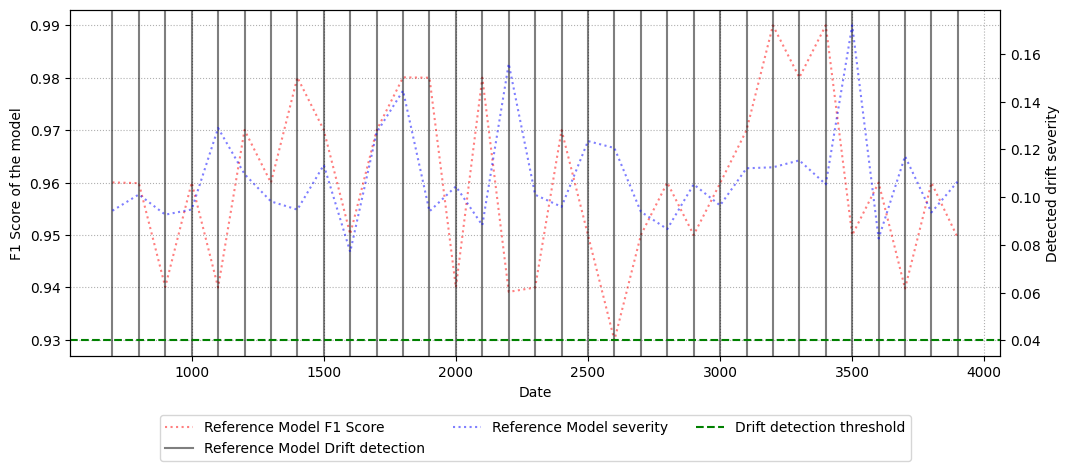

In [19]:
figure = reporter_retrained.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

figure = reporter_reference.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

### Chunk by chunk analysis
One may split the results into chunks (for example weeks) to quickly discover interesting parts of the data to further study

In [20]:
for r in reporter_retrained.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

for r in reporter_reference.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
4,1.0,0.124990,0.611111,0.973888
2,1.0,0.114829,0.449206,0.978577
3,1.0,0.111545,0.507937,0.985709
1,1.0,0.106686,0.484127,0.981423
0,1.0,0.104834,0.480952,0.978582


,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
4,1.0,0.114438,0.506667,0.951836
2,1.0,0.111304,0.490476,0.951294
1,1.0,0.107944,0.457143,0.967185
3,1.0,0.104847,0.477778,0.971413
0,1.0,0.102828,0.474603,0.955720


### Per class analysis
Analyse different classes and find potentially problematic ones. Automatic plotting of the most drifted classes can be done, or various manual plotting functions can be used to further examine interesting behaviour

* Here, we can look at the most drifted classes, then analyse the most correlated ones or examine the model retraining effects on the most drifted class

Most drifted classes:

Experiment Retraining Model
Miner    0.745483
Other    0.796894
dtype: float64

 Compare F1 scores between experiments:


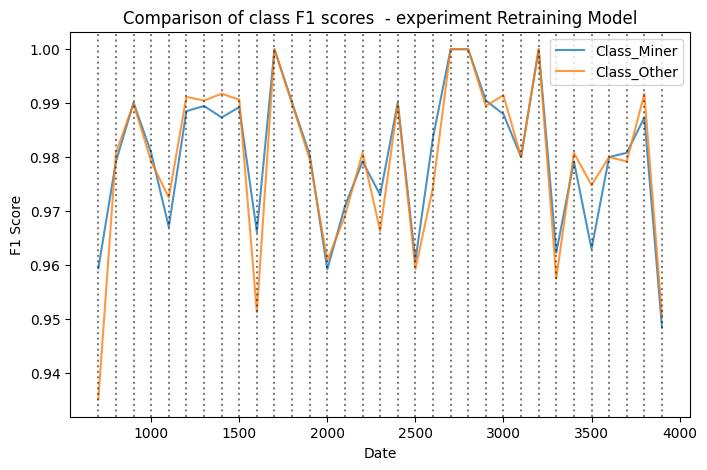

Compare drifts between experiments:


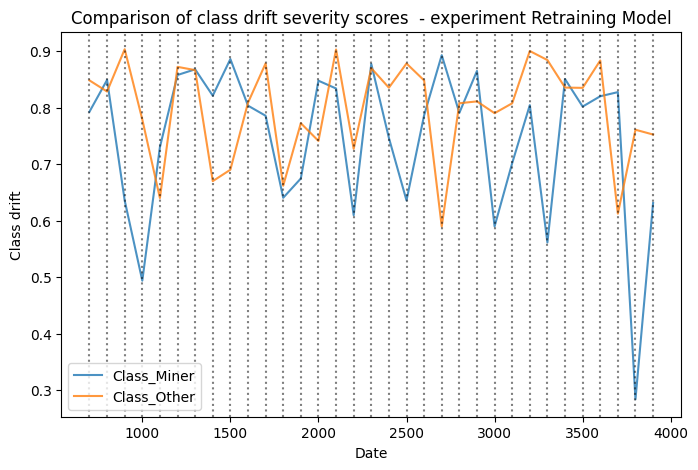

Class pairs with most correlated F1 scores
Miner  Other    0.927747
dtype: float64

Class pairs with most correlated drifts
Miner  Other    0.027764
dtype: float64
Most drifted classes:

Experiment Reference Model
Miner    0.734283
Other    0.797706
dtype: float64

 Compare F1 scores between experiments:


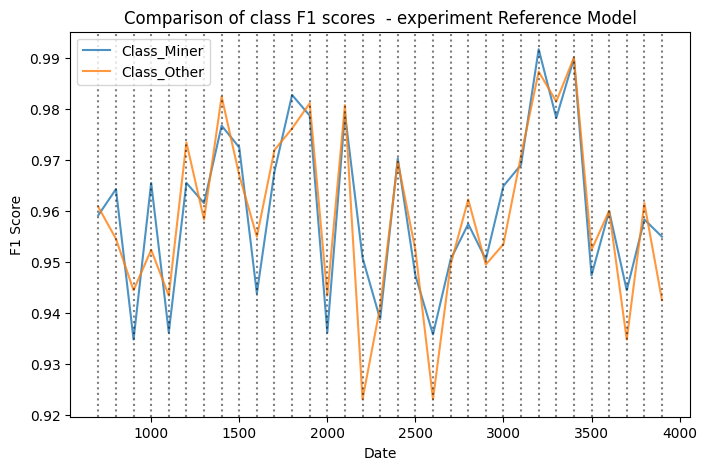

Compare drifts between experiments:


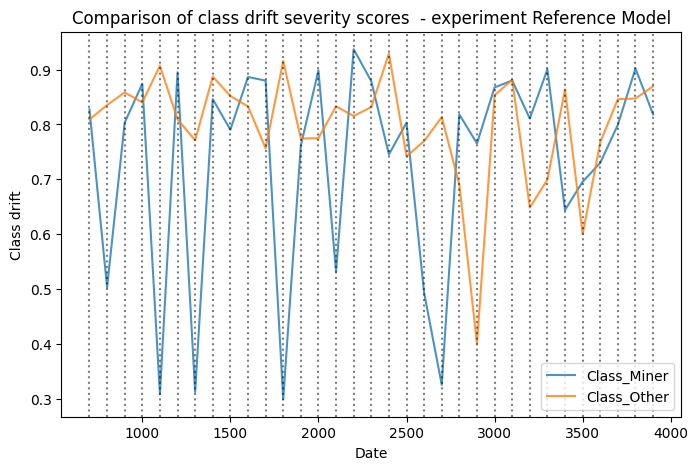

Class pairs with most correlated F1 scores
Miner  Other    0.879822
dtype: float64

Class pairs with most correlated drifts
Miner  Other    0.13295
dtype: float64


In [21]:
reporter_retrained.analyse_class_drift(5)

reporter_reference.analyse_class_drift(5)

In [16]:
#Example of multifeature support
#reporter_ref.plot_class("class_f1",[56,59,55])
#reporter_ref.plot_class("class_drift",[39,72])
#reporter_ref.plot_class_comparison([9,10])

### Per feature analysis
Analyse different features and find potentially problematic ones. 

Most drifted features:

Experiment Retraining Model
SIZE_1    0.134536
IPT_23    0.132375
IPT_16    0.128792
DIR_16    0.128050
IPT_10    0.126478
dtype: float64

 Compare drifts between experiments:


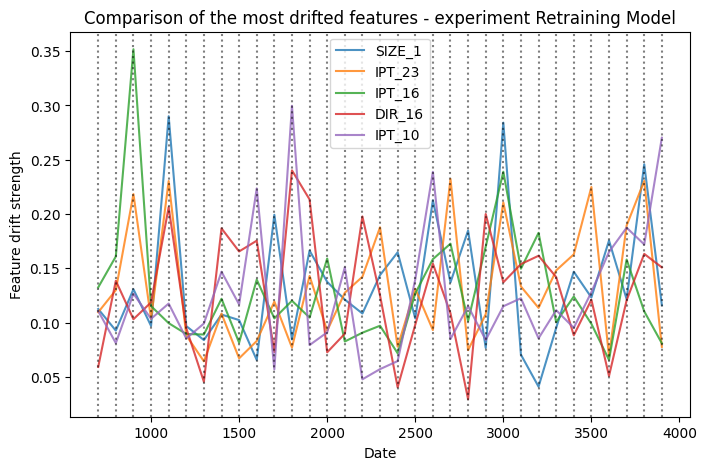

Most drifted features:

Experiment Reference Model
IPT_21    0.177857
IPT_26    0.159277
IPT_14    0.154031
IPT_29    0.145722
DIR_16    0.145595
dtype: float64

 Compare drifts between experiments:


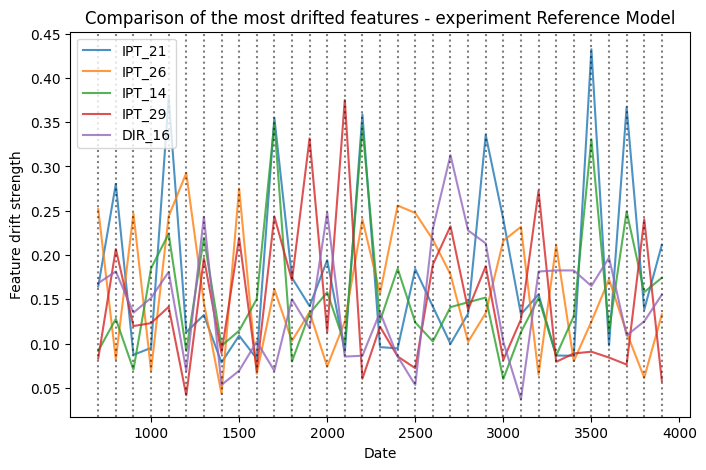

In [22]:
reporter_retrained.analyse_feature_drift(5)

reporter_reference.analyse_feature_drift(5)

In [66]:
#reporter.plot_feature_comparison("SIZE_4")

In [22]:
#Example of multifeature support
#reporter.plot_feature(["SIZE_5","DIR_3"])

# Detailed logs

In [23]:
detailed_logs_retrained = logger_retrained[0].get_logs()

detailed_logs_reference = logger_reference[0].get_logs()

In [19]:
#display(detailed_logs["description"])
#display(detailed_logs["overview"])
#display(detailed_logs["test_info"])
#detailed_logs["global_drift"]
#detailed_logs["class_drift"]
#detailed_logs["class_shares"]
#detailed_logs["class_f1"]
#detailed_logs["feature_drift"]

In [24]:
detailed_logs_retrained["global_drift"][detailed_logs_retrained["global_drift"]["is_drifted"] == True ]

,is_drifted,drift_strength,share_drifted_features,f1
700,True,0.114099,0.422222,0.950121
800,True,0.108669,0.522222,0.980000
900,True,0.093457,0.522222,0.989999
1000,True,0.112409,0.577778,0.980016
1100,True,0.097546,0.666667,0.969918
1200,True,0.130168,0.444444,0.990013
1300,True,0.077492,0.211111,0.990005
1400,True,0.139763,0.600000,0.989978
1500,True,0.088279,0.477778,0.990007
1600,True,0.122473,0.577778,0.960000


In [25]:
detailed_logs_reference["global_drift"][detailed_logs_reference["global_drift"]["is_drifted"] == True ]

,is_drifted,drift_strength,share_drifted_features,f1
700,True,0.094318,0.333333,0.960032
800,True,0.101123,0.700000,0.959903
900,True,0.092655,0.322222,0.940097
1000,True,0.094825,0.355556,0.960000
1100,True,0.128989,0.622222,0.940000
1200,True,0.109671,0.311111,0.970040
1300,True,0.098216,0.677778,0.959968
1400,True,0.094773,0.300000,0.980057
1500,True,0.113478,0.366667,0.970027
1600,True,0.077090,0.344444,0.950167
